# Homework 4
<span style="font-size: 1.5em;">**CDS-101 (Spring 2017)**</span>

<span style="font-size: 1.5em;">**Name:** Helena Gray</span>

The code below loads the necessary packages for data analysis and reads in the datasets 'starbucks.csv' and 'simdata.RData'.

In [2]:
# Set the location of our personally installed R packages
.libPaths(new = "~/Rlibs")
# Load the Tidyverse and modelr packages
library(tidyverse)
library(modelr)
# Provide notification if NA values are dropped when modeling
options(na.action = na.warn)
# Load the datasets for Homework 4
starbucks <- read_csv("starbucks.csv")
load("simdata.RData")

## Uncomment the code below to change the plot window size
# options(repr.plot.width = 6, repr.plot.height = 4)

## Uncomment the code below to change the tibble printing format.
# options(tibble.print_max = 30, tibble.print_min = 20,
#         tibble.width = Inf)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Parsed with column specification:
cols(
  item = col_character(),
  calories = col_integer(),
  fat = col_double(),
  carb = col_integer(),
  fiber = col_integer(),
  protein = col_integer(),
  type = col_character()
)


### Question 1. ### 

Based on my knowledge, the amount of carbohydrates a food item contains is positively correlated with how many calories that food item provides. In this case, the number of calories will be the explanatory variable and the response variable will be the number of carbohydrates. This model is probably not true for all amounts of calories. Some foods have high amounts of fat and sugar but low amounts of carbohydrates and still provide a high number of calories.

### Question 2. ### 

The code below makes use of a couple of functions to model the linear relationship between carbohydrate content and calorie content. The code uses the lm() function to model the 'carb' and 'calories' columns from the 'starbucks' dataset to create a visual representation to describe the relationship between the two variables. The data_grid() function creates a tibble that has a column of each unique value of the specified column, in this case it's 'calories'. The add_predictions() function adds the predicted values of the response variable to the tibble containing the unique values of the explanatory variable. ggplot() and geom_point() plot the actual values of the 'calories' and 'carbs' columns while the geom_line() function takes the predicted response variable values and plots a line to illustrate the trend of the relationship between calories and carbohydrates.


Call:
lm(formula = carb ~ calories, data = starbucks)

Coefficients:
(Intercept)     calories  
      8.944        0.106  


# A tibble: 29 × 1
   calories
      <int>
1        80
2       130
3       140
4       160
5       170
6       180
7       190
8       210
9       270
10      280
# ... with 19 more rows
# A tibble: 29 × 2
   calories     pred
      <int>    <dbl>
1        80 17.42603
2       130 22.72758
3       140 23.78788
4       160 25.90850
5       170 26.96881
6       180 28.02912
7       190 29.08943
8       210 31.21005
9       270 37.57190
10      280 38.63221
# ... with 19 more rows


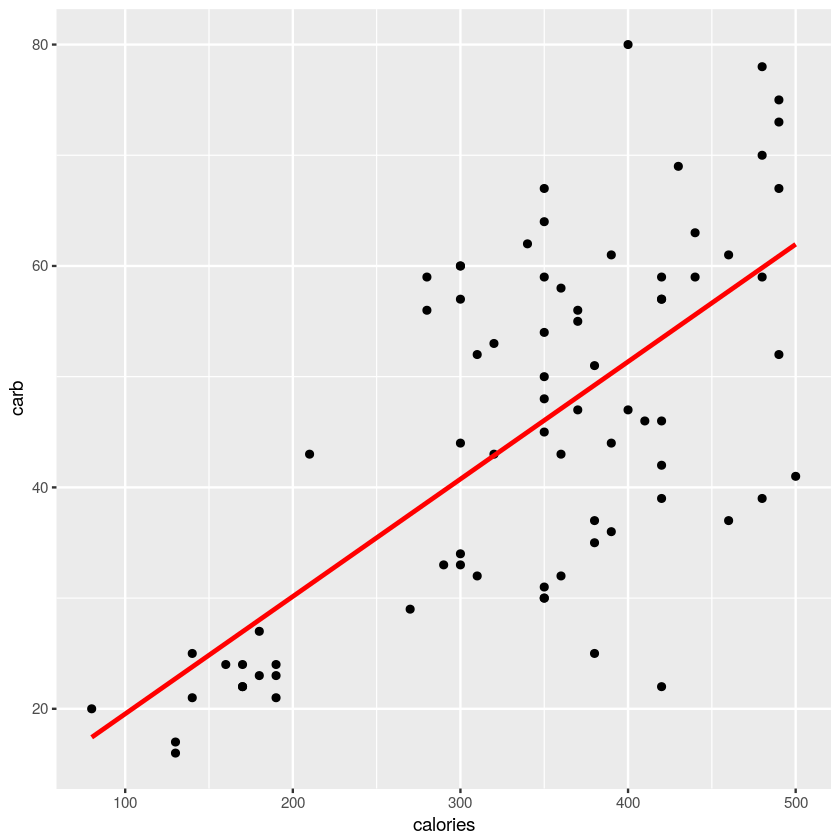

In [28]:
sim1_model <- lm(carb~calories, starbucks)
sim1_model

grid <- data_grid(starbucks, calories)
print(grid)

grid <- add_predictions(grid, sim1_model)
print(grid)

ggplot(starbucks) +
geom_point(aes(calories, carb)) +
geom_line(aes(calories, pred), data=grid, color="red", size=1)



The add_residuals() function adds the residuals to the tibble, which are the differences between the predicted response variable values and the actual response variable values for each unique explanatory variable value. The geom_ref_line() function creates the thick white line as the reference line that symbolizes no difference between predicted and actual values. ggplot() and geom_point() maps out the residual points for each unique value of calories.

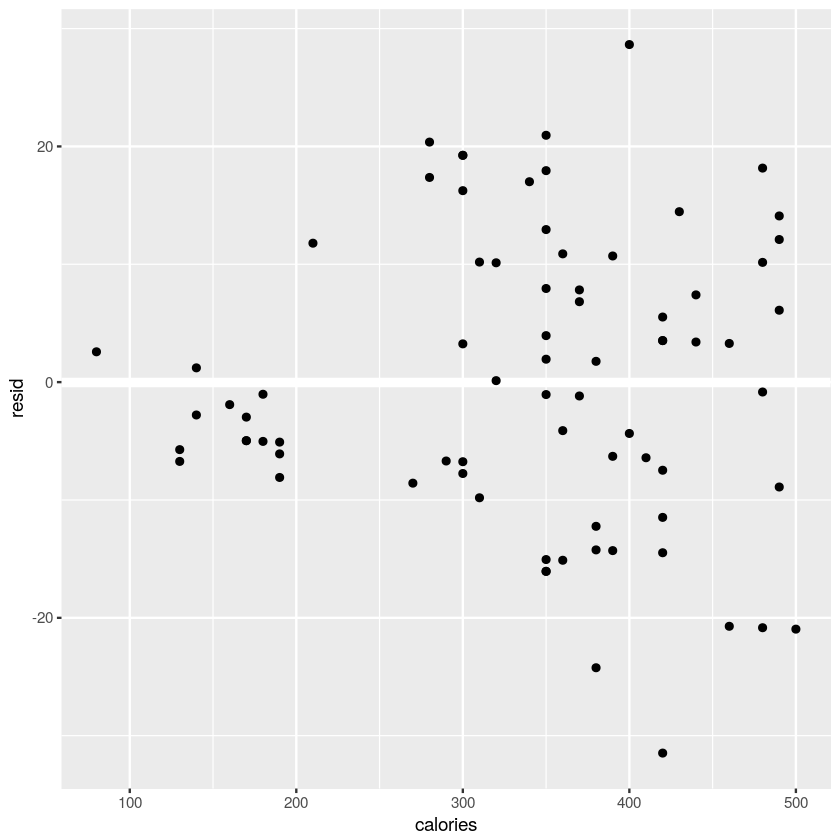

In [4]:
sim1_resid <- add_residuals(starbucks, sim1_model)

ggplot(sim1_resid) +
geom_ref_line(h=0) +
geom_point(aes(calories, y=resid))

It seems that food items with a low amount of calories have less variation in the discrepancy between actual and predicted values of carbohydrates while those food items with higher numbers of calories have greater variation.

The code below creates a frequency polygon plot of the residuals using ggplot() and geom_freqpoly() functions. It's like a line graph version of a histogram.

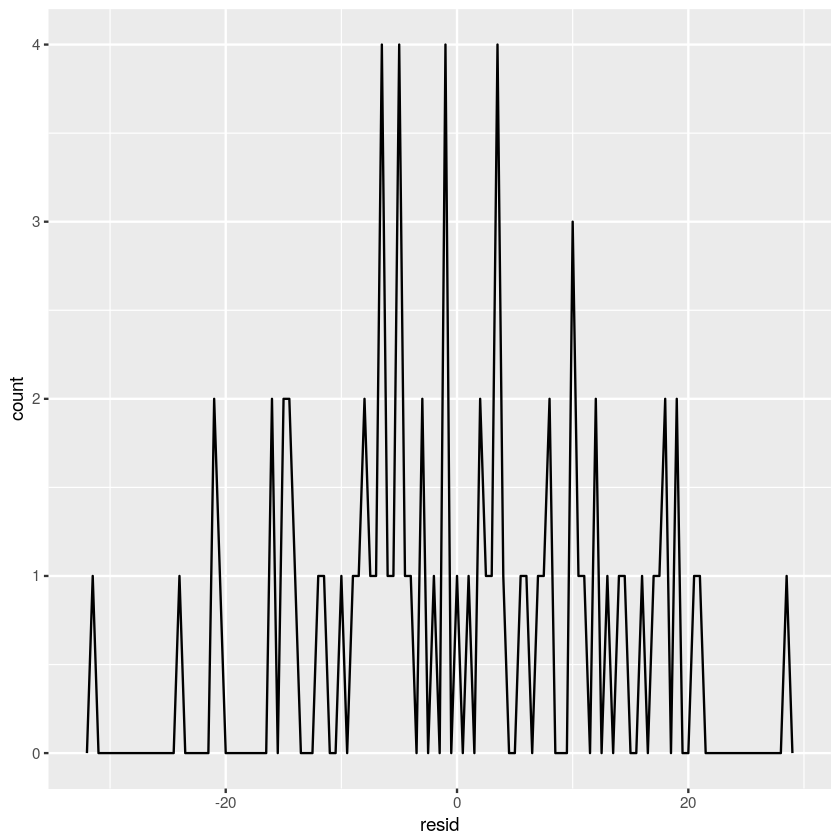

In [5]:
ggplot(sim1_resid) +
geom_freqpoly(aes(resid), binwidth=0.5)

The distribution of residuals appears to be relatively normal, with most of the residuals being around 0 (indicating the linear model is fairly accurate).

### Question 3. ###
This data seems to meet the required conditions for a least squares regression line as the pattern for the data is relatively linear, the observations are independent of one another, and the data has a nearly normal distribution of residuals. However the data points do not appear to remainly tightly clustered around the least squares regression line nor do the residuals appear to be evenly distributed in the scatterplot.

However, the data could be skewed because those foods with a high amount of protein or fat but low carbs could still have a high number of calories so this model could actually be incorrect.

### Question 4. ###

The code below separates the simdata dataset to three different tibbles for each simulated dataset by using the filter() function and specifying the label of the simulated dataset.

In [6]:
sim_a_simdata<-filter(simdata, label=='sim_a')


sim_b_simdata<-filter(simdata, label=='sim_b')

sim_c_simdata<-filter(simdata, label=='sim_c')


The code below fits a linear model to the sim_a dataset, plots the linear model and the dataset to demonstrate how well the lienar model represents the dataset, and then plots the residuals in a scatterplot and a frequency polygon plot to show if the variability of the residuals is constant which is one of the conditions necessary to satisfy to justify the use of a linear model.


Call:
lm(formula = y ~ x, data = sim_a_simdata)

Coefficients:
(Intercept)            x  
      6.153        1.482  


# A tibble: 10 × 1
       x
   <int>
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
# A tibble: 30 × 4
       x         y label      resid
   <int>     <dbl> <chr>      <dbl>
1      1  6.664979 sim_a -0.9696820
2      1  7.982189 sim_a  0.3475283
3      1  8.304699 sim_a  0.6700386
4      2  6.259045 sim_a -2.8574711
5      2  8.606901 sim_a -0.5096155
6      2  6.221735 sim_a -2.8947809
7      3 11.315656 sim_a  0.7172836
8      3 11.454724 sim_a  0.8563517
9      3  9.895552 sim_a -0.7028202
10     4 12.648988 sim_a  0.5687603
# ... with 20 more rows
# A tibble: 10 × 2
       x      pred
   <int>     <dbl>
1      1  7.634661
2      2  9.116516
3      3 10.598372
4      4 12.080228
5      5 13.562083
6      6 15.043939
7      7 16.525795
8      8 18.007651
9      9 19.489506
10    10 20.971362


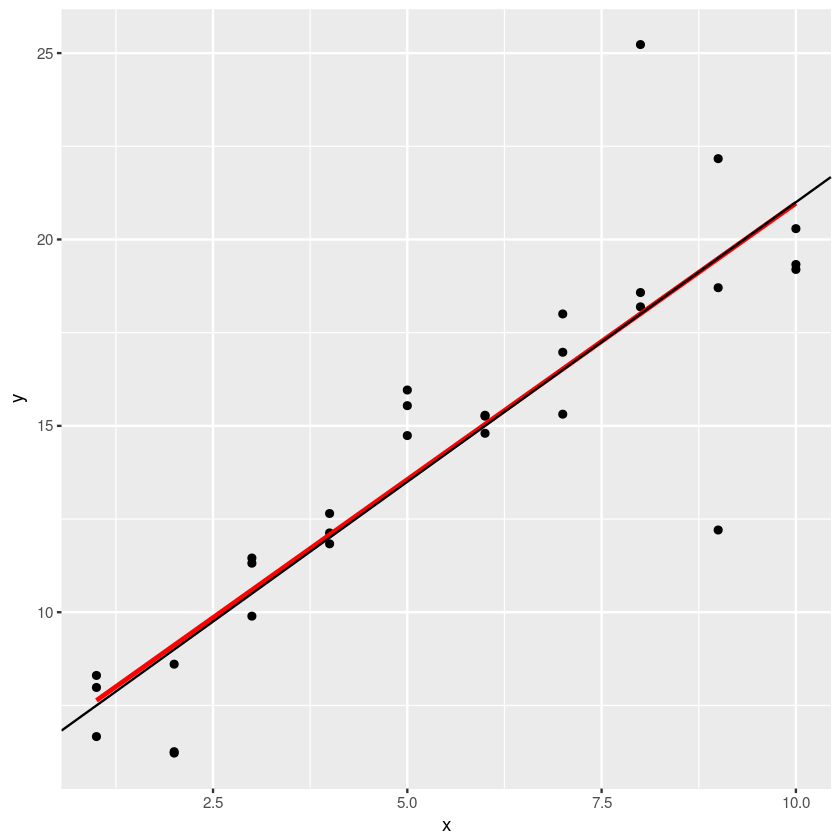

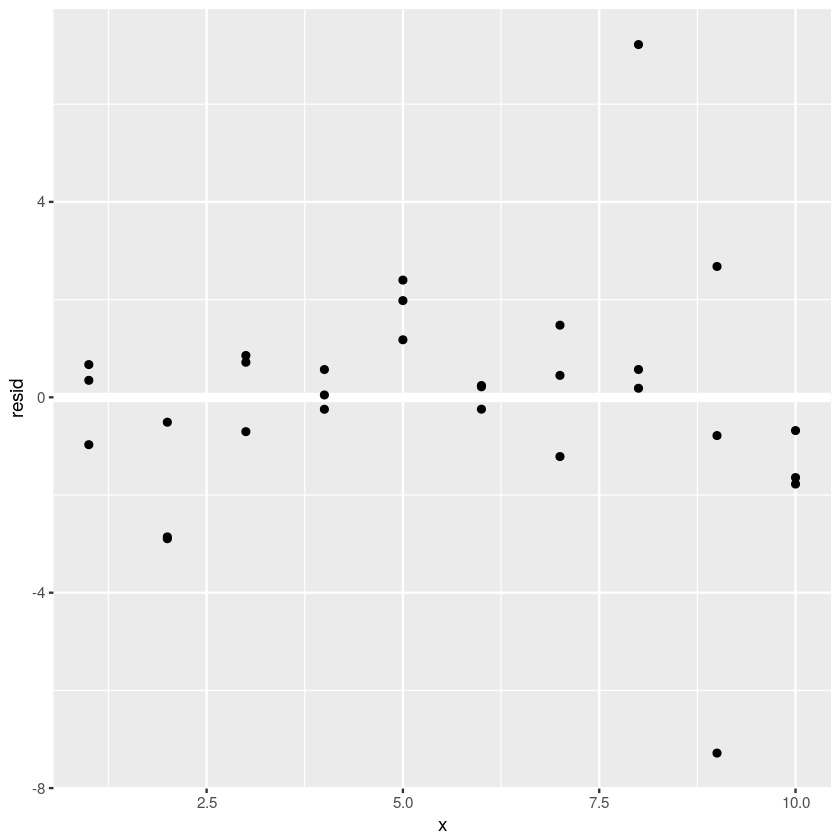

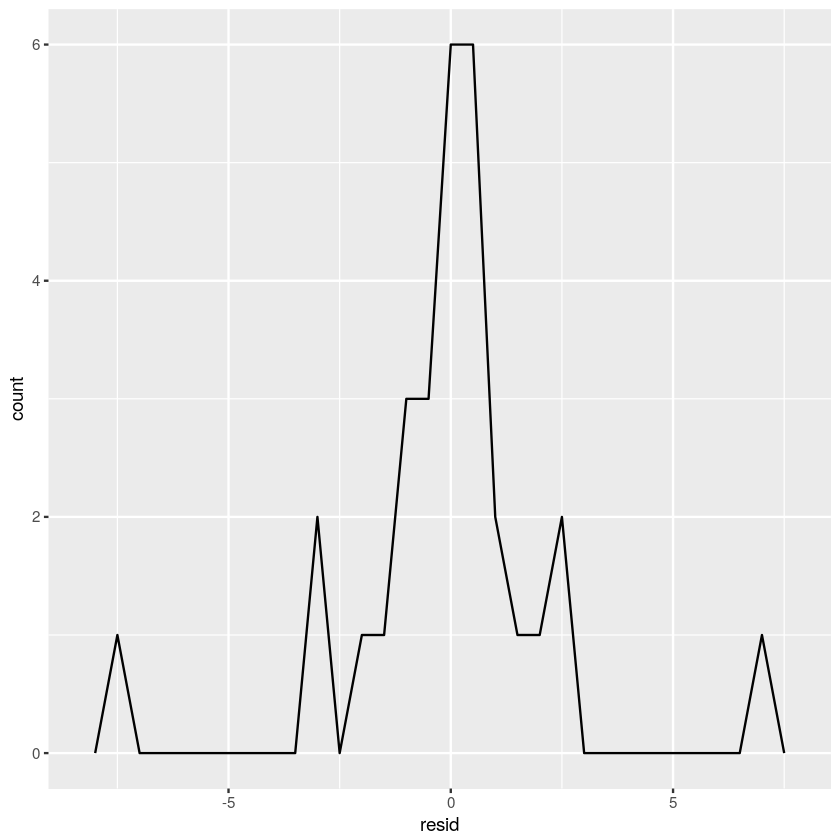

In [7]:
sim_a_model <- lm(y~x, sim_a_simdata)
sim_a_model

grid <- data_grid(sim_a_simdata, x)
print(grid)

sim_a_resid <- add_residuals(sim_a_simdata, sim_a_model)
print(sim_a_resid)

grid <- add_predictions(grid, sim_a_model)
print(grid)

sima_plot<-ggplot(sim_a_simdata) +
geom_point(aes(x, y)) +
geom_line(aes(x, y=pred), data=grid, color="red", size=1) + 
geom_abline(intercept=6,slope=1.5)

sima_plot

sima_resid_scatterplot<-ggplot(sim_a_resid) +
geom_ref_line(h=0) +
geom_point(aes(x, y=resid))

sima_resid_scatterplot

sima_freqpoly<-ggplot(sim_a_resid) +
geom_freqpoly(aes(resid), binwidth=0.5)

sima_freqpoly

This dataset seems to conform pretty well to the linear model and has a fairly normal distribution of residuals and constant variance. 

The code below fits a linear model to the sim_b dataset, plots the linear model and the dataset to demonstrate how well the lienar model represents the dataset, and then plots the residuals in a scatterplot and a frequency polygon plot to show if the variability of the residuals is constant which is one of the conditions necessary to satisfy to justify the use of a linear model.


Call:
lm(formula = y ~ x, data = sim_b_simdata)

Coefficients:
(Intercept)            x  
      5.748        1.498  


# A tibble: 10 × 1
       x
   <int>
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
# A tibble: 30 × 4
       x         y label      resid
   <int>     <dbl> <chr>      <dbl>
1      1  6.463563 sim_b -0.7822471
2      1  6.895462 sim_b -0.3503476
3      1  6.497586 sim_b -0.7482242
4      2  9.740443 sim_b  0.9967212
5      2  9.440358 sim_b  0.6966354
6      2  5.749456 sim_b -2.9942662
7      3 12.260701 sim_b  2.0190666
8      3 12.666744 sim_b  2.4251097
9      3  7.124891 sim_b -3.1167432
10     4 13.690909 sim_b  1.9513625
# ... with 20 more rows
# A tibble: 10 × 2
       x      pred
   <int>     <dbl>
1      1  7.245810
2      2  8.743722
3      3 10.241635
4      4 11.739547
5      5 13.237459
6      6 14.735372
7      7 16.233284
8      8 17.731197
9      9 19.229109
10    10 20.727021


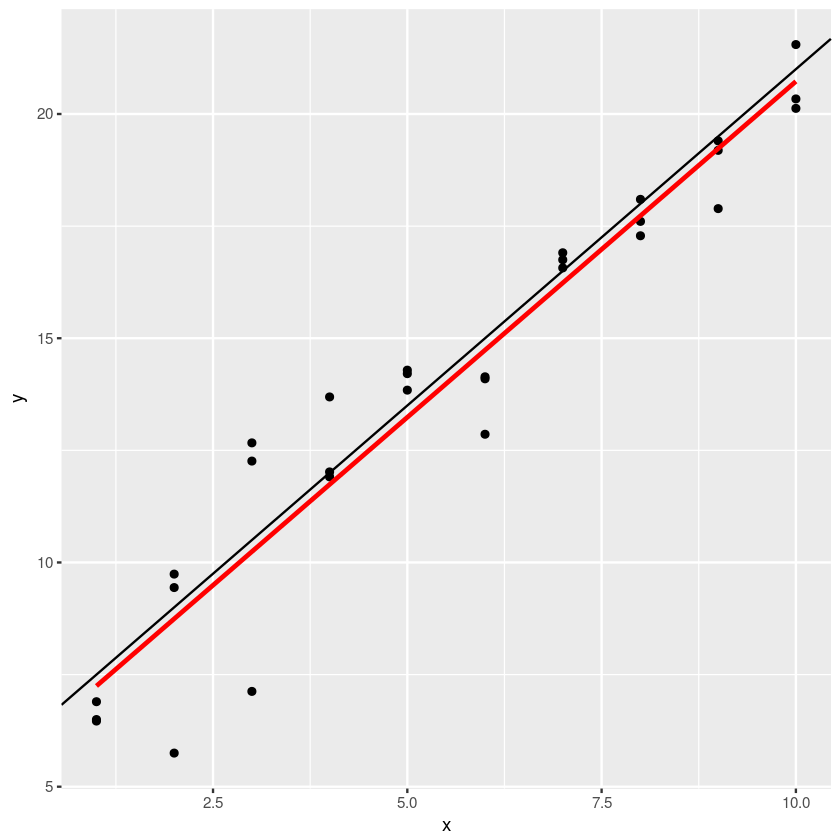

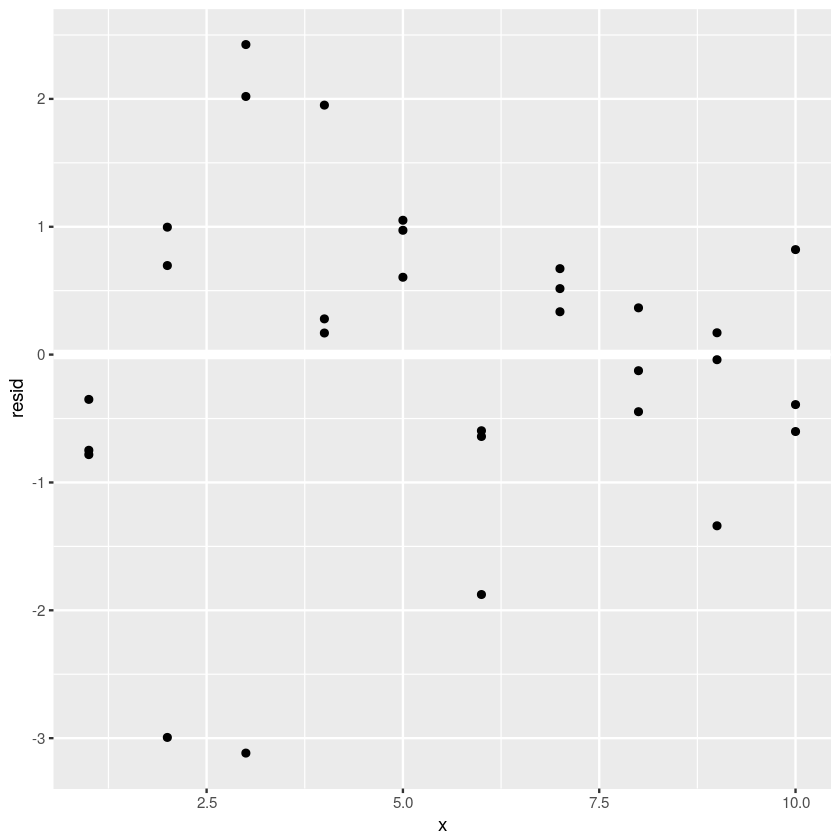

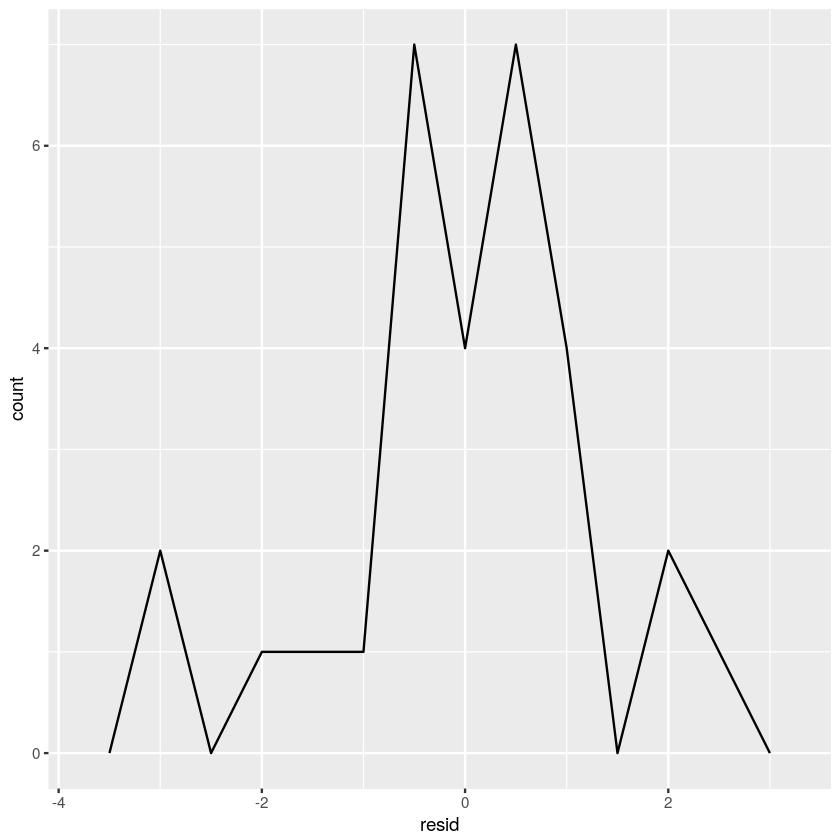

In [8]:
sim_b_model <- lm(y~x, sim_b_simdata)
sim_b_model

grid <- data_grid(sim_b_simdata, x)
print(grid)

sim_b_resid <- add_residuals(sim_b_simdata, sim_b_model)
print(sim_b_resid)

grid <- add_predictions(grid, sim_b_model)
print(grid)

simb_plot<-ggplot(sim_b_simdata) +
geom_point(aes(x, y)) +
geom_line(aes(x, y=pred), data=grid, color="red", size=1) + 
geom_abline(intercept=6,slope=1.5)

simb_plot

simb_resid_scatterplot<-ggplot(sim_b_resid) +
geom_ref_line(h=0) +
geom_point(aes(x, y=resid))

simb_resid_scatterplot

simb_freqpoly<-ggplot(sim_b_resid) +
geom_freqpoly(aes(resid), binwidth=0.5)

simb_freqpoly

This linear model seems to have a relatively normal distribution of residuals and constant variance however the scatterplot of residuals reveals that the higher values of x seem to conform more closely to the linear model than the lower values of x indicating that there may be another type of correlation that more accurately represents the relationship between x and y than a linear correlation.

The code below fits a linear model to the sim_c dataset, plots the linear model and the dataset to demonstrate how well the lienar model represents the dataset, and then plots the residuals in a scatterplot and a frequency polygon plot to show if the variability of the residuals is constant which is one of the conditions necessary to satisfy to justify the use of a linear model.


Call:
lm(formula = y ~ x, data = sim_c_simdata)

Coefficients:
(Intercept)            x  
      6.201        1.494  


# A tibble: 10 × 1
       x
   <int>
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
# A tibble: 30 × 4
       x         y label       resid
   <int>     <dbl> <chr>       <dbl>
1      1  7.269889 sim_c -0.42554092
2      1  8.156796 sim_c  0.46136619
3      1  7.642158 sim_c -0.05327174
4      2  9.276237 sim_c  0.08640271
5      2  9.295213 sim_c  0.10537924
6      2  8.669480 sim_c -0.52035362
7      3 12.656824 sim_c  1.97258569
8      3 11.296132 sim_c  0.61189401
9      3 10.306466 sim_c -0.37777264
10     4 12.461735 sim_c  0.28309287
# ... with 20 more rows
# A tibble: 10 × 2
       x      pred
   <int>     <dbl>
1      1  7.695430
2      2  9.189834
3      3 10.684238
4      4 12.178642
5      5 13.673047
6      6 15.167451
7      7 16.661855
8      8 18.156259
9      9 19.650663
10    10 21.145067


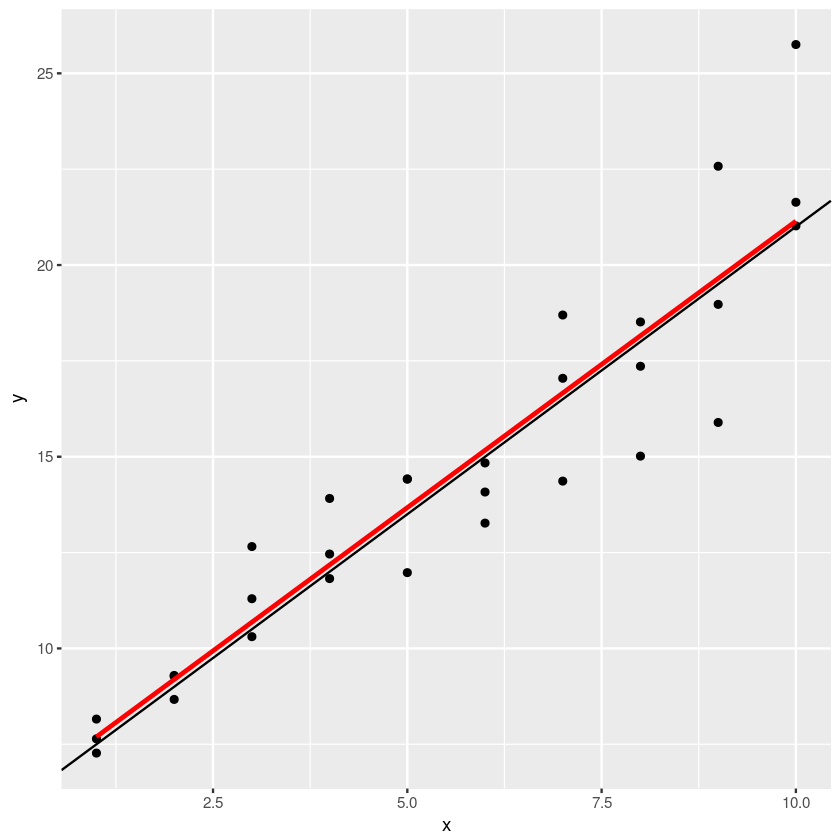

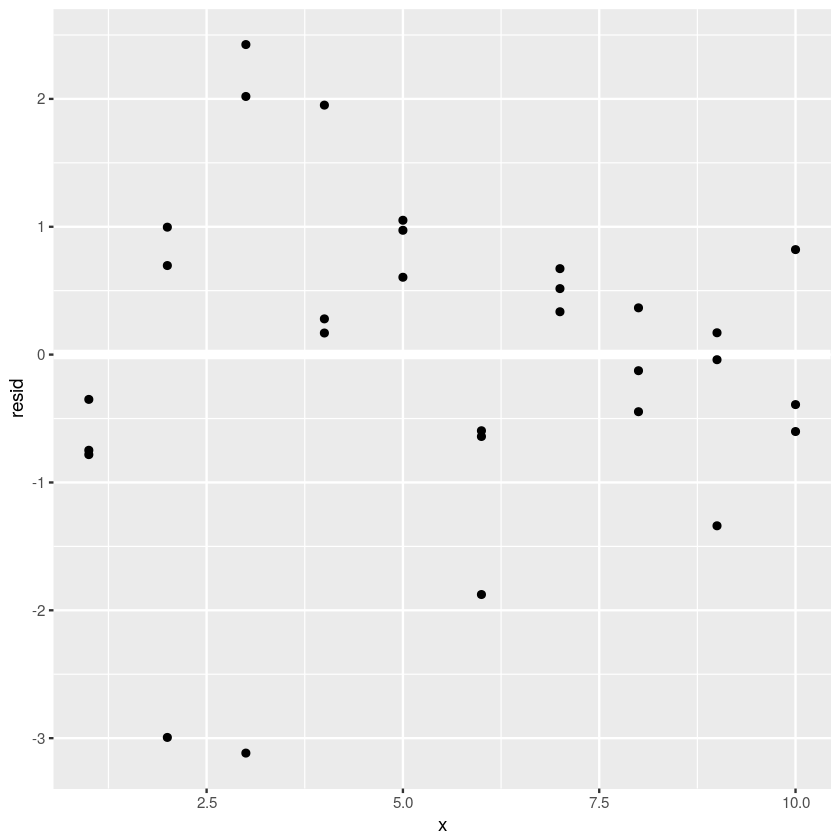

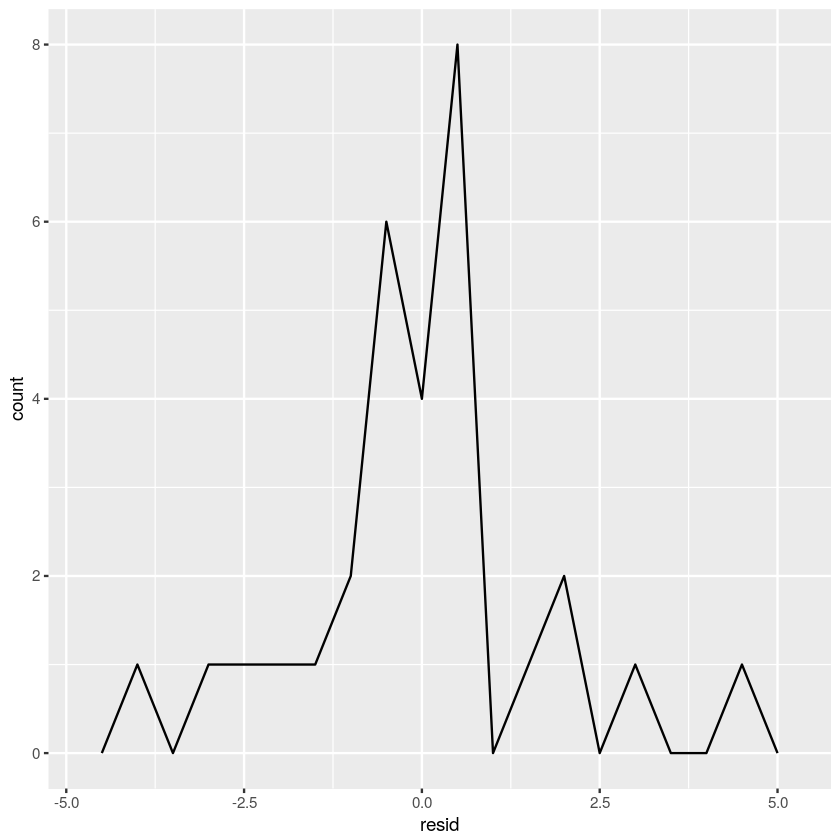

In [9]:
sim_c_model <- lm(y~x, sim_c_simdata)
sim_c_model

grid <- data_grid(sim_c_simdata, x)
print(grid)

sim_c_resid <- add_residuals(sim_c_simdata, sim_c_model)
print(sim_c_resid)

grid <- add_predictions(grid, sim_c_model)
print(grid)

simc_plot<-ggplot(sim_c_simdata) +
geom_point(aes(x, y)) +
geom_line(aes(x, y=pred), data=grid, color="red", size=1) + 
geom_abline(intercept=6,slope=1.5)

simc_plot

simc_resid_scatterplot<-ggplot(sim_c_resid) +
geom_ref_line(h=0) +
geom_point(aes(x, y=resid))

simb_resid_scatterplot

simc_freqpoly<-ggplot(sim_c_resid) +
geom_freqpoly(aes(resid), binwidth=0.5)

simc_freqpoly

The data points for sim_c_simdata dataset seem to follow a linear model however the residuals do not seem to have equal variance nor do they have a normal distribution. The distribution of residuals seems slightly skewed to the right.

### Question 5###

The following code shows an alternative to the least-squares criterion, the mean-absolute distance criterion, which
involves averaging over the absolute value of residuals instead of squaring them. This is implemented
by using the function optim() in combination with the custom function 'make_prediction' shown below.

The code uses the optim() function to fit the "sim_a", "sim_b", and "sim_c" datasets from simdata using the mean absolute
distance. The plot for the sim_a dataset shows both the mean-absolute distance and least-squares lines.

In [10]:
make_prediction <- function(intercept_slope_parameters, data) {
intercept_slope_parameters[1] +
data$x * intercept_slope_parameters[2]
}

measure_distance <- function(intercept_slope_parameters, dataset) {
diff <- dataset$y - make_prediction(intercept_slope_parameters,
dataset)
mean(abs(diff))
}

[1] 1.453251

[1] 6.526740 1.455442


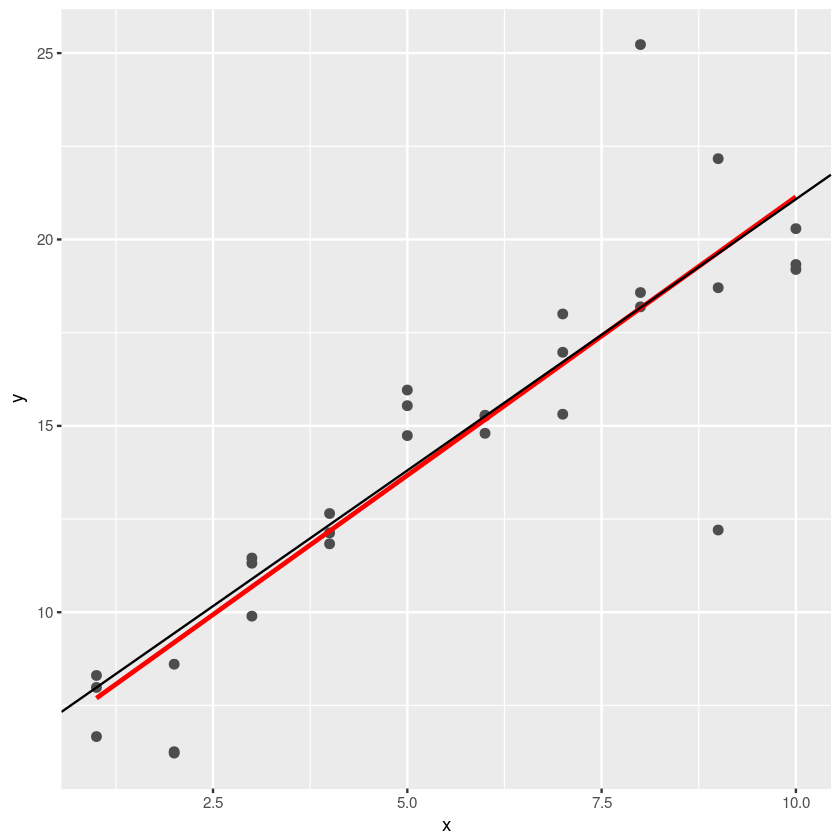

In [11]:
measure_distance(c(6.153,1.482), sim_a_simdata)

sima_model_parameters <- optim(c(16, -5), measure_distance, data=sim_a_simdata)
print(sima_model_parameters$par)

ggplot(sim_a_simdata) +
  geom_point(aes(x,y),size=2, color="grey30") +
  geom_line(aes(x, pred), data=grid, color="red", size=1) +
  geom_abline(intercept=sima_model_parameters$par[1],slope=sima_model_parameters$par[2]) 


For this model the larger residuals seem to have not affected the model as the least-squares regression line and the mean-absolute distance model are nearly identical.

[1] 0.9364936

[1] 6.282876 1.434050


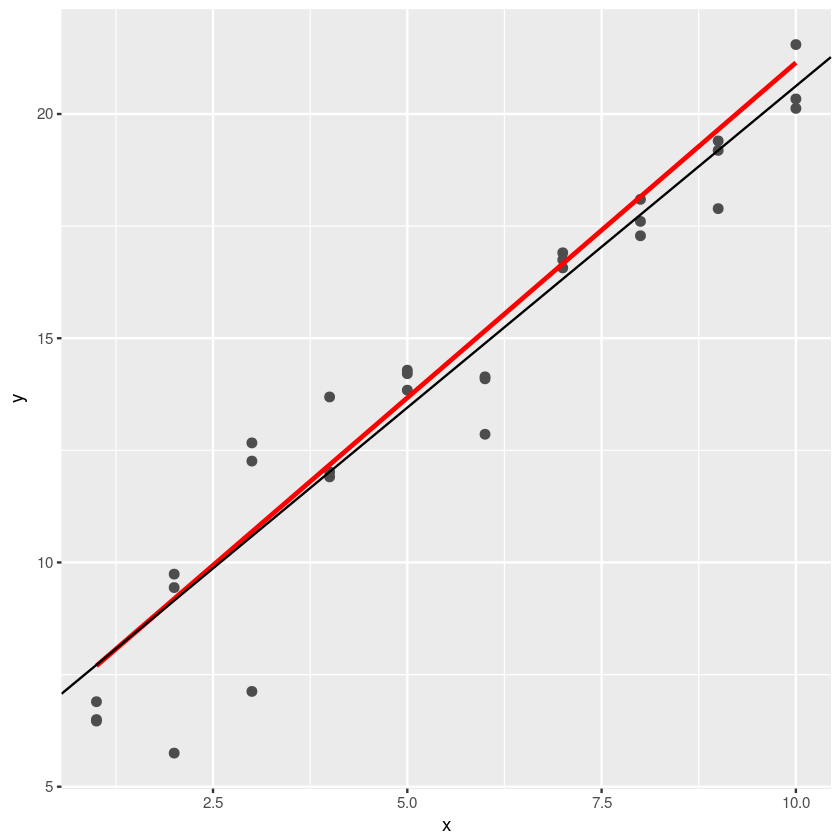

In [14]:
measure_distance(c(5.748,1.498), sim_b_simdata)

simb_model_parameters <- optim(c(16, -5), measure_distance, data=sim_b_simdata)
print(simb_model_parameters$par)

ggplot(sim_b_simdata, aes(x, y)) +
  geom_point(size=2, color="grey30") +
 geom_line(aes(x, pred), data=grid, color="red", size=1) +
  geom_abline(intercept=simb_model_parameters$par[1],
              slope=simb_model_parameters$par[2])

For the sim_b_simdata the mean-absolute distance criterion seems to also match the least squares regression line fairly well.

[1] 1.169489

[1] 6.340168 1.468029


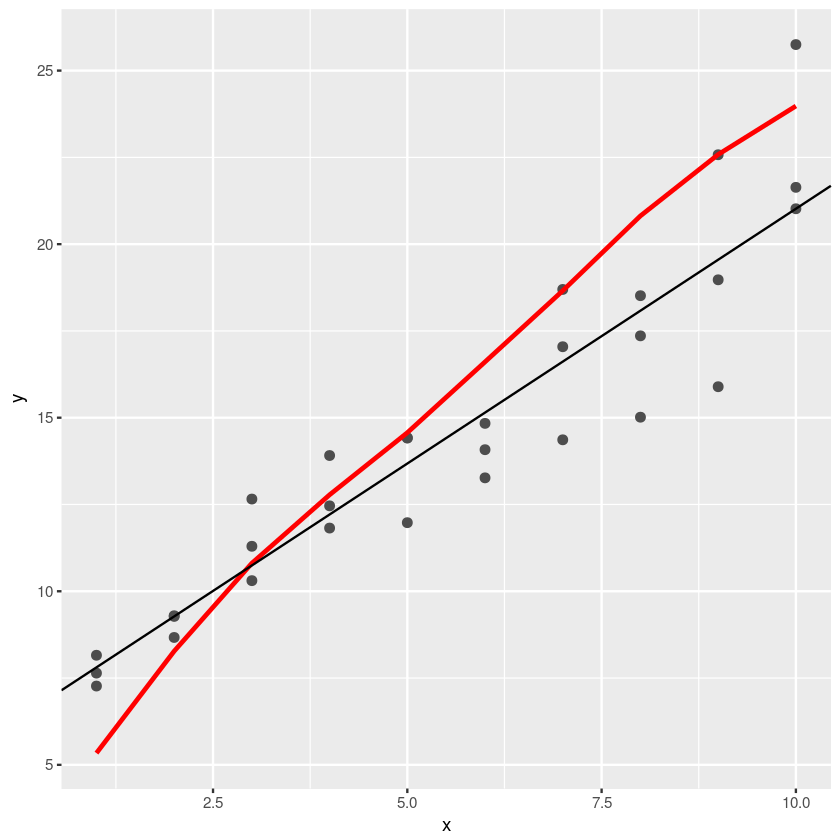

In [18]:
measure_distance(c(6.201,1.494), sim_c_simdata)

simc_model_parameters <- optim(c(16, -5), measure_distance, data=sim_c_simdata)
print(simc_model_parameters$par)

ggplot(sim_c_simdata, aes(x, y)) +
  geom_point(size=2, color="grey30") +
 geom_line(aes(x, pred), data=grid, color="red", size=1) +
  geom_abline(intercept=simc_model_parameters$par[1],
              slope=simc_model_parameters$par[2])

This dataset has wildly different models for the mean-absolute criterion and the least squares regression line.

### Question 5###

Another alternative to lm() is to fit a smooth curve using the loess() function. Follow the
procedure in Chapter 23.3 of R for Data Science of model fitting, grid generation, predictions, and
visualization on the sim1 dataset (loaded as part of the modelr library). The plot should also include
the least-squares line for comparison. Calculate the residuals and frequency polygon. How does this
compare with the least-squares line? How does it compare with the default method of geom_smooth()?

Call:
loess(formula = y ~ x, data = sim1)

Number of Observations: 30 
Equivalent Number of Parameters: 4.19 
Residual Standard Error: 2.262 


Call:
lm(formula = y ~ x, data = sim1)

Coefficients:
(Intercept)            x  
      4.221        2.052  


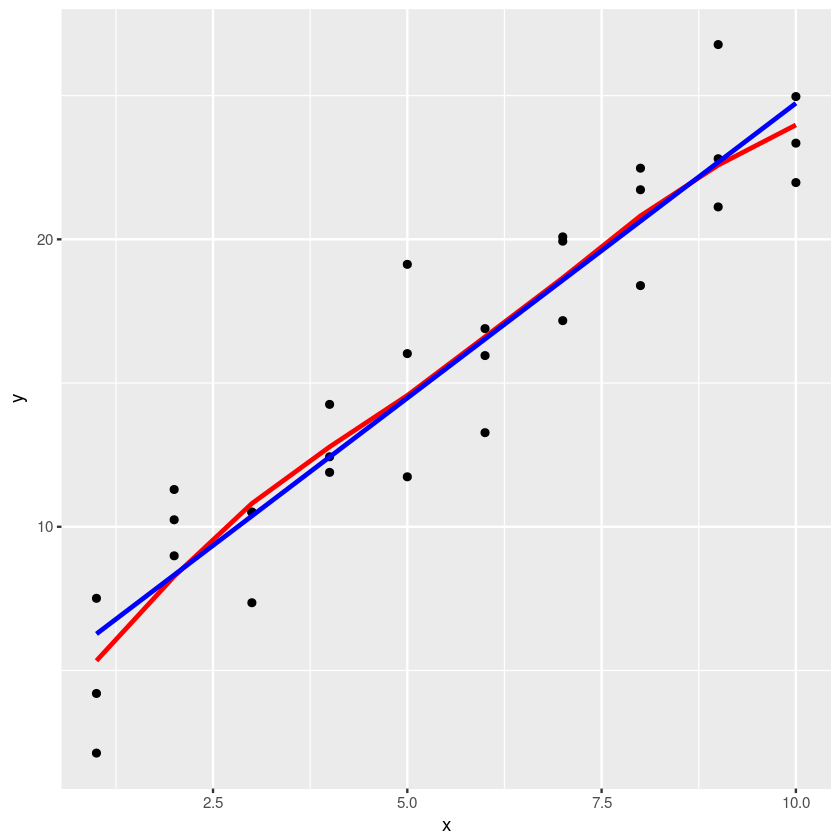

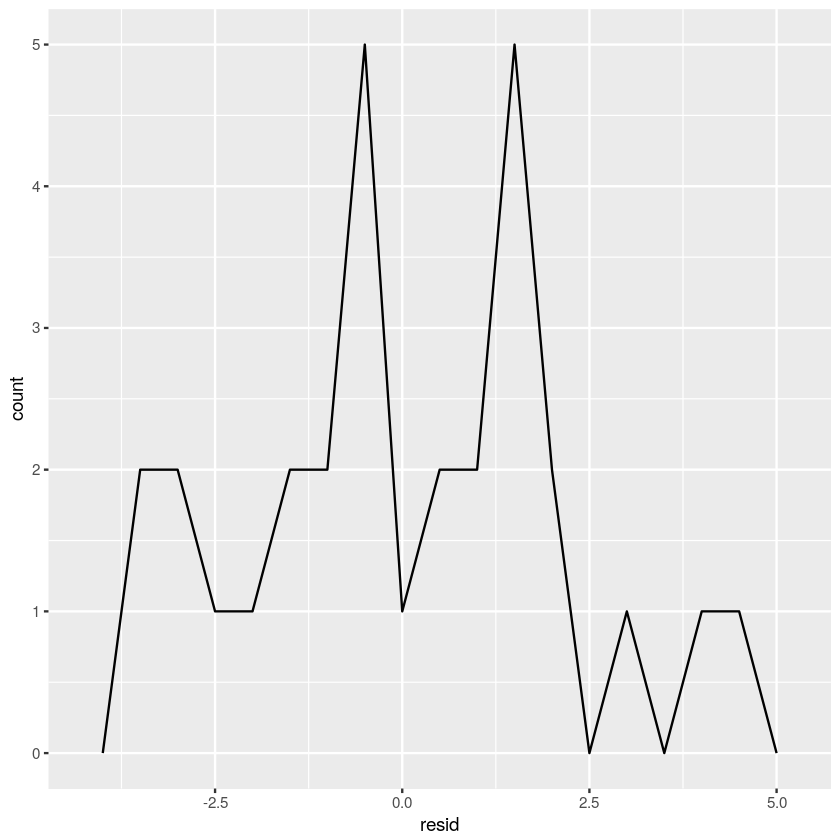

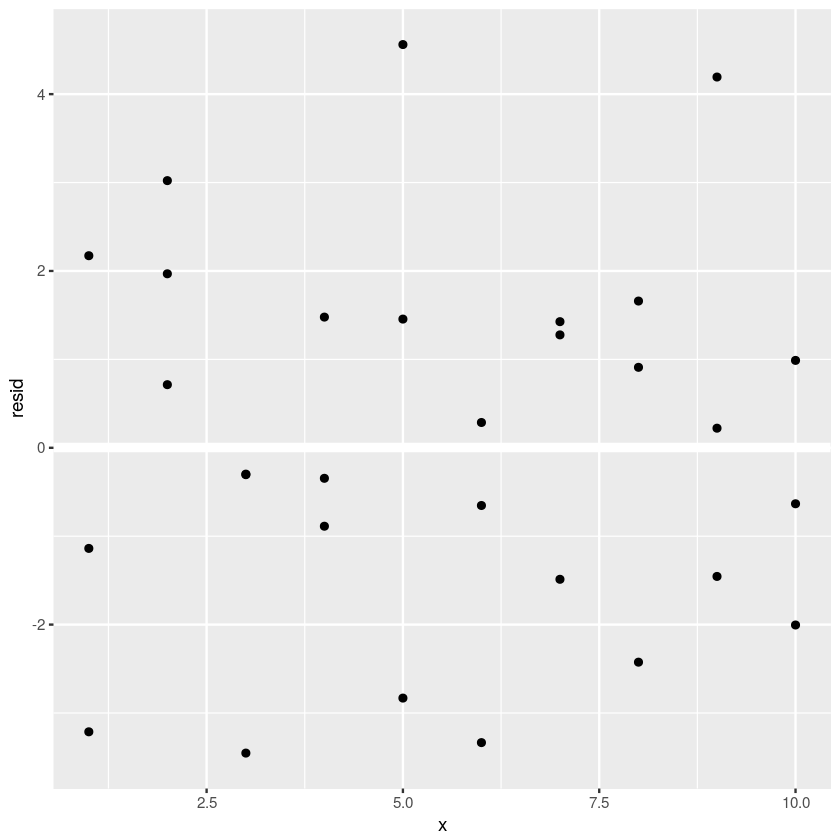

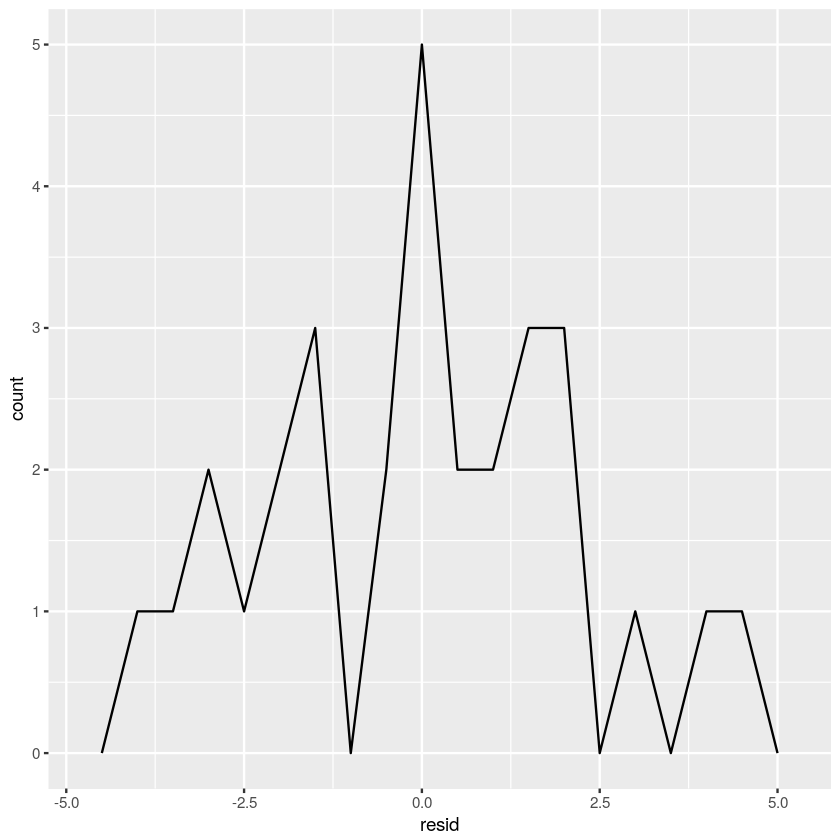

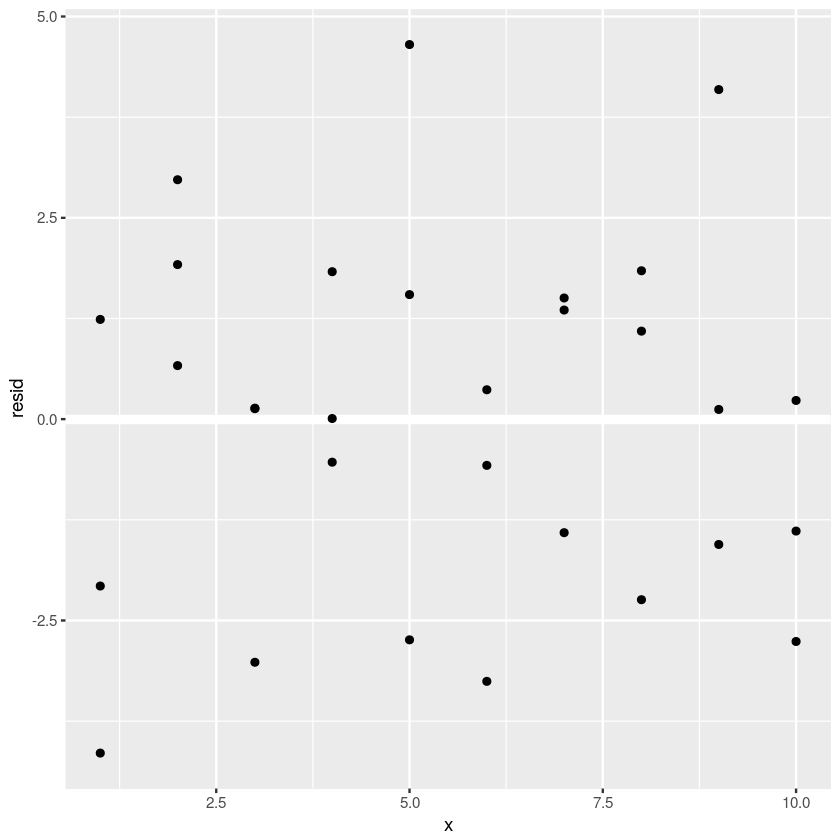

In [21]:
sim_loess_mod <- loess(y ~ x, data = sim1)
sim_loess_mod

sim_lm_model <- lm(y~x, sim1)
sim_lm_model

grid_loess <- sim1 %>% 
  data_grid(x) 

grid_loess <- grid_loess %>% 
  add_predictions(sim_loess_mod)

grid_lm <- sim1 %>% 
  data_grid(x) 

grid_lm <- grid_lm %>% 
  add_predictions(sim_lm_model)

ggplot(sim1, aes(x)) +
  geom_point(aes(y = y)) +
  geom_line(aes(y = pred), data = grid_loess, colour = "red", size = 1) +
geom_line(aes(y = pred), data = grid_lm, colour = "blue", size = 1)

sim_loess <- sim1 %>% 
  add_residuals(sim_loess_mod)

ggplot(sim_loess, aes(resid)) + 
  geom_freqpoly(binwidth = 0.5)

ggplot(sim_loess, aes(x, resid)) + 
  geom_ref_line(h = 0) +
  geom_point() 


sim_lm <- sim1 %>% 
  add_residuals(sim_lm_model)

ggplot(sim_lm, aes(resid)) + 
  geom_freqpoly(binwidth = 0.5)

ggplot(sim_lm, aes(x, resid)) + 
  geom_ref_line(h = 0) +
  geom_point() 


The loess function seems to actually fit fairly well with the least-squares regression line, just a little more curved on the lower and upper values for x. A visual inspection indicates both methods produce an equal variance, but neither have normal distributions for the residuals it seems and the distribution for the residuals changes with both methods.

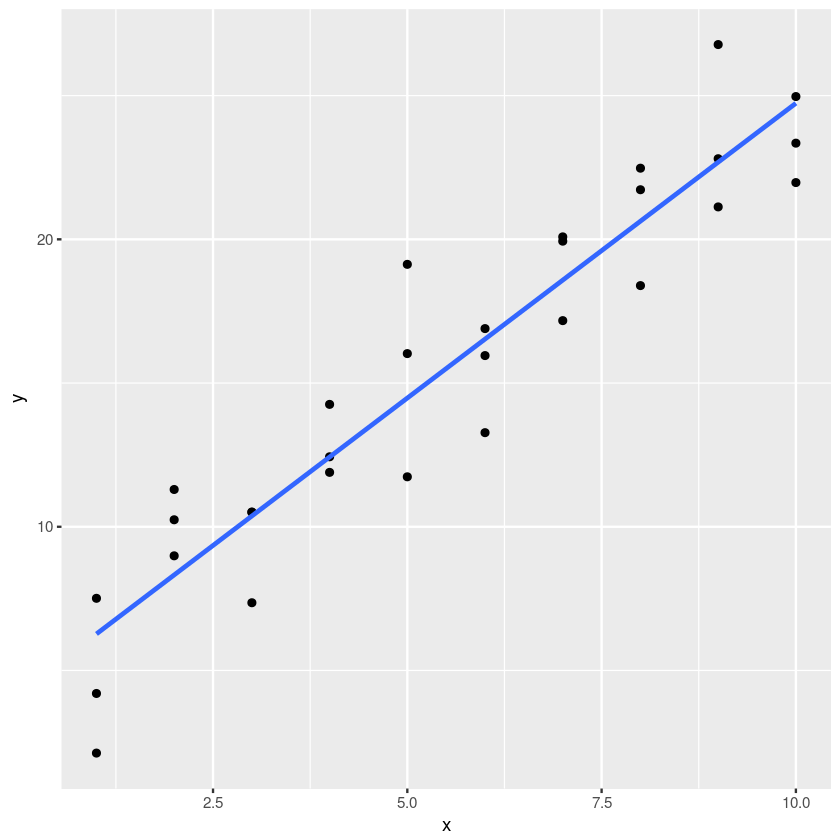

In [22]:
ggplot(sim1) +
  geom_point(aes(x=x, y = y)) + 
  geom_smooth(mapping=aes(x=x,y=y),method='lm',se=FALSE)


The loess() function does not produce as linear a model as the geom_smooth() function for the sim1 dataset, however that's because the loess() function actually seems to be more sensitive to the pattern in the data than either the geom_smooth() function or the least-squares regression model.